# Regressão Logística

Regressão logística é uma técnica de classificação que pertence ao grupo dos classificadores lineares* e de alguma forma parecida com regressão linear. É uma técnica rápida e simples de entender, além de conveniente para interpretar os resultados. Apesar de ser, essencialmente, um método para classificação binária, pode ser usado para classificação multi-classes.

\* classificação baseada em uma combinação linear entre as variáveis de entrada, também chamado de _logit_.

ex: $f(X) = \alpha + b_1x_1 + b_2x_2 +\dots + b_nx_n$.

## Função Sigmoid

O objetivo da Regressão Logística é encontrar a função $p($**x**$)$ tal que as saídas estimadas $p(x_i)$ fiquem o mais próximo possível do valor real de $y_i$ para cada amostra $i = 1, 2, \dots, n$. Como, em um primeiro momento, vamos lidar exclusivamente de classificação binária, essas saídas devem ser apenas $0$ ou $1$. Sendo assim, é conveniente utilizar a função Sigmoid (caso especial da função logística).

<img src="assets/log-reg-1.webp" alt="sigmoid" width="400"/>


## Juntando a combinação linear com a função Sigmoid

A Regressão logística determina os melhores valores para o bias $\alpha$ e os pesos $b_1, b_2, \dots, b_n$, tal que a função $p($**x**$)$ se aproxime da classe real da amostra. O processo de encontrar os melhores valores para esses parâmetros é chamado de treinamento (ou _fitting_ ).

Nesse caso, **x** que a função Sigmoid ($p$) recebe é a saída da combinação linear $f(X) = \alpha + b_1x_1 + b_2x_2 +\dots + b_nx_n$.

## Como encontrar os melhores valores para o bias e os pesos?

Os melhores pesos são geralmente encontrados maximizando a função de verosimilhança logarítmica (_log-likelihood_ ) O método é chamado de maximização da verossimilhança (_maximum likelihood estimation_ - MLE) e é representado pela seguinte equação.

\begin{equation}
MLE = \sum_{i=1}^n(y_i log(p(x_i)) + (1 − y_i) log(1 − p(x_i))).
\end{equation}
<img src="assets/log-reg-4.webp" alt="log" width="400"/>

Os melhores parâmetros para maximizar essa equação podem ser encontrados usando técnicas matemáticas, essa parte será executada pelo scikit-learn.

## Implementação

### Exemplo 1 - Classificação binária com uma única variável de entrada

In [1]:
# Passo n° 1: Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Passo n° 2: Gerando dados para classificação

# Gerando os dados de entrada. Serão geradas 10 amostras com valores de 0 a 9
# note que os modelos do scikit-learn esperam um array composto com um array de características
# por amostra de entrada (mesmo que seja apenas 1 característica). Por isso fazemos um reshape.
x = np.arange(10).reshape(-1, 1) 

# gerando as classes para cada amostra
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print('x = {}'.format(x))
print('y = {}'.format(y))

x = [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y = [0 0 0 0 1 1 1 1 1 1]


In [3]:
# Passo n° 3: Criando e treinando um modelo

# Criando ou estanciando o modelo:
#   solver é o algoritmo utilizado para otimizar os parâmetros.
#     liblinear é a melhor opção para datasets pequenos e binários.
#   random_state = 0, ou qualquer número, garante que a inicialização aleatória vai ser sempre igual, 
#     independente de quantas vezes rodar o algoritmo

# "ovr" representa a classificação BINÁRIA
# "multinomial" representa a classificação MULTICLASSE
model = LogisticRegression(solver='liblinear', random_state=0, multi_class='ovr')

# O modelo possui diversos hiperparâmetros que podem ser ajustados, como penalidade (padrão L2), número 
#   de iterações, etc. Sugiro que deem uma olhada na documentação:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Treinando o modelo
model.fit(x, y)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [4]:
# Podemos extrair algumas informações do modelo, como por exemplo:

# as classes presentes no conjunto de dados
print('classes = {}'.format(model.classes_))

# o valor do bias
print('bias = {}'.format(model.intercept_))

# os pesos
print('pesos = {}'.format(model.coef_))

classes = [0 1]
bias = [-1.04608067]
pesos = [[0.51491375]]


In [5]:
# Passo n° 4: Avaliando o modelo

# uma das formas de avaliar o modelo, é através a probabilidade  que ele dá à cada amostra
#   de pertencer a cada classe
probabilidades = model.predict_proba(x)

# uma outra forma mais comum é através da classe que o modelo estimou
classe_estimada = model.predict(x)

print('probabilidades = {}\n'.format(probabilidades))
print('classe_estimada = {}'.format(classe_estimada))

probabilidades = [[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]

classe_estimada = [0 0 0 1 1 1 1 1 1 1]


Podemos visualizar essa classificação na figura a seguir:
<img src="assets/log-reg-5.webp" alt="univariate" width="800"/>

Note que a classificação corresponde ao limiar $p(x) = 0.5$, que ocorre quando $f(x) = 0$. Esse valor é o limite da classificação entre as classe $0$ e $1$.

In [6]:
# uma outra métrica bem interessante é a acurácia, ou taxa de acerto do nosso modelo, 
#   que pode ser computada da seguinte maneira:

# esse valor representa a relação entre o número de acertos dividido pelo número total de amostras.
#   caso acerte todas as predições, o resultado é igual a 1.
model.score(x, y)

0.9

## Melhorando nosso modelo

Podemos melhorar o modelo alterando alguns dos hiper-parâmetros. Podemos, por exemplo, alterar o valor do hiper-parâmetro C (um valor de regularização) de $1.0$ (padrão) para $10.0$:

In [7]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x, y)

Essa mudança já é capaz de gerar diferentes probabilidades:

In [8]:
print('bias = ',model.intercept_)
print('pesos = ',model.coef_)
print('probabilidades = ',model.predict_proba(x))
print('classes estimadas = ',model.predict(x))

bias =  [-3.51335372]
pesos =  [[1.12066084]]
probabilidades =  [[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
classes estimadas =  [0 0 0 0 1 1 1 1 1 1]


Essa regularização gerou valores mais significativos nos bias e nos pesos, implicando em uma mudança na nossa função logit $f(x)$. Essa mudança também foi importante para distorcer a nossa função sigmoid, sendo que agora o valor de limiar ($p(x)=0.5$) foi deslocado mais para a direita, como mostrado na figura a seguir:

<img src="assets/log-reg-7.webp" alt="regularized" width="600"/>

printando novamente nosso relatório, podemos observar que dessa vez obtemos o valor máximo em todas as métricas, indicando que a classificação foi $100%$ satisfatória.

In [9]:
print('acurácia = ', model.score(x, y))
#print('matriz de confusão = ')
#print( confusion_matrix(y, model.predict(x)))
#print(classification_report(y, model.predict(x)))

acurácia =  1.0


## Prática Aula 2  - Métricas para Avaliação

## Matriz de confusão

A matriz de confusão permite obter informações mais detalhadas sobre o resultado da classificação, levando em conta a taxa de acerto de cada classe. Nesse caso, utilizamos 4 novas métricas:

- Verdadeiros Negativos (True negatives - **TN**): amostras negativas (zeros) estimadas corretamente
- Verdadeiros Positivos (True positives - **TP**): amostras positivas (1's) estimadas corretamente
- Falsos Negativos (False negatives - **FN**): amostras negativas (zeros) estimadas incorretamente
- Falsos Positivos (False positives - **FP**): amostras positivas (1's) estimadas incorretamente

A matriz de confusão mostra esses valores da seguinte forma:

- **TN**: no canto superior esquerdo
- **FN**: no canto inferior esquerdo
- **FP**: no canto superior direito
- **TP**: no canto inferior direito

In [10]:
# podemos computar a matriz de confusão da seguinte maneira

# poderiamos usar model.predict(x), mas já temos os resultados das predições na variável classe_estimada
cm = confusion_matrix(y, classe_estimada)
print('CM = ')
print(cm)

CM = 
[[3 1]
 [0 6]]


A primeira linha da matriz de confusão mostra que 3 amostras da classe zero foram classificadas como classe zero, enquanto 1 amostra da classe zero foi classificada erroneamente como classe 1.

Do mesmo modo, a segunda linha mostra que nenhuma amostra da classe 1 foi classificada erroneamente como classe 0, pois todas as amostras (6) da classe 1 foram classificadas corretamente.

Podemos plotar a matriz de confusão para ter uma melhor visualização desses resultados:

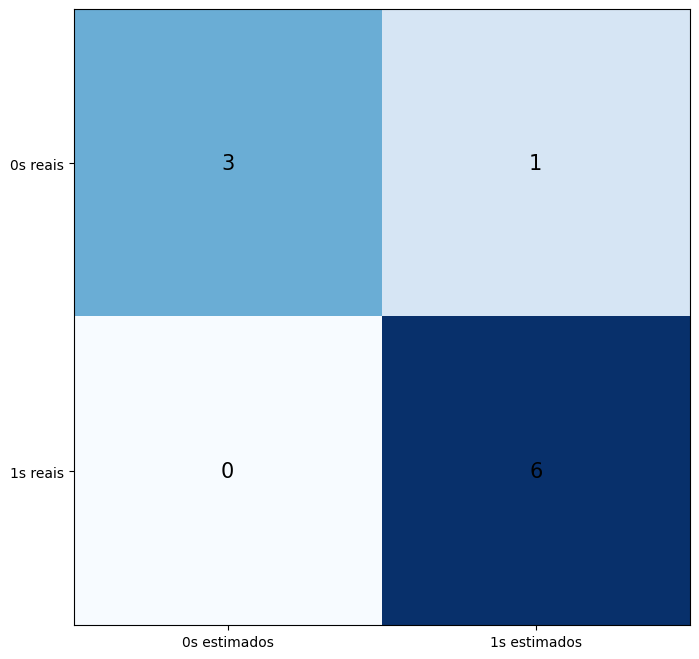

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s estimados', '1s estimados'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s reais', '1s reais'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',  size=15)
plt.show()

Podemos também obter um relatório mais detalhado da classificação utilizando a função classification_report():

In [12]:
print(classification_report(y, classe_estimada))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Onde as métricas representam:

- **Precisão** = TP/TP+FP ou TN/TN+FN -> Taxa de acerto considerando todas as amostras classificadas como sendo da classe.
- **Recall** = TP/TP+FN ou TN/TN+FP -> Taxa de quantas amostras da classe foram corretamente classificadas.
- **F1, Macro AVG e Weighted AVG** -> Similar a acurácia, mas são ponderadas pelo número de amostras por classes.
- **support** -> número de amostras consideradas em cada caso

<img src="assets/prec_rec.png" alt="prec_rec" width="400"/>

### Exemplo 2 - Similar ao exemplo 1, mudando apenas a classe da segunda amostra

In [13]:
# Passo 1: importando os pacotes e classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Passo 2: Gerando os dados
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Passo 3: Criando e treinando o modelo
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Passo 4: avaliando o modelo
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

visualizando os resultados:

In [14]:
#print('x:', x, sep='\n')
#print('y:', y, sep='\n', end='\n\n')
#print('bias:', model.intercept_)
#print('pesos:', model.coef_, end='\n\n')
print('probabilidades:', p_pred, sep='\n', end='\n\n')
print('classes estimadas:', y_pred, end='\n\n')
print('acurácia:', score_, end='\n\n')
print('matriz de confusão:', conf_m, sep='\n', end='\n\n')
print('relatório:', report, sep='\n')

probabilidades:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

classes estimadas: [0 0 0 1 1 1 1 1 1 1]

acurácia: 0.8

matriz de confusão:
[[2 1]
 [1 6]]

relatório:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



Nesse caso, 2 amostras foram classificadas erroneamente, como mostrado na figura a seguir:

<img src="assets/log-reg-8.webp" alt="regularized" width="600"/>

A figura acima revela uma característica importante da regressão logística: Ela não resolve problemas que não sejam linearmente separáveis. Em outras palavras, não é possível encontrar uma reta que separe as amostras, nesse caso, de forma a conseguir $100\%$ de acurácia.

### Exemplo 3 - Reconhecendo Dígitos

O proximo exemplo lida com uma abordagem de problema do mundo real, de reconhecimento de imagem, com multiplas classes. Para isso, utilizaremos um dataset composto por 1797 imagens de digitos de $8\times8$ pixels, representados por um vetor de $64$ posições.

In [15]:
# Passo 1: importando os pacotes

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Passo 2a: importando os dados

x, y = load_digits(return_X_y=True)

print('Dimensões x:', x.shape)
print('Dimensões y:', y.shape)
print('x=', x, sep='\n')
print('y=', y, sep='\n')

Dimensões x: (1797, 64)
Dimensões y: (1797,)
x=
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y=
[0 1 2 ... 8 9 8]


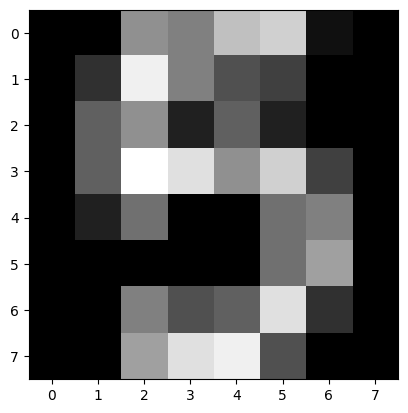

In [17]:
# Visualizando alguns digitos
sample = np.random.randint(0, len(x))
img = x[sample].reshape((8,8)).astype(np.uint8)

imgplot = plt.imshow(img, cmap="gray")

In [18]:
# Passo 2b: dividindo os dados em conjunto de treino e conjunto de teste

# Conjunto de treino é usado para ajustar o modelo (encontrar o bias e os pesos), 
#    enquanto o conjunto de testes é usado para avaliar o quão bom o modelo é para predizer casos
#    desconhecido, ou seja, amostras que não foram utilizadas no treinamento.

# Essa divisão é geralmente feita de modo aleatório, sendo que, geralmente, 70% a 80% dos dados é usado pra
#    treinamento e o restante para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
# Passo 2c: Normalizando os dados

# A maioria dos algoritmos de aprendizado de máquina funcionam melhor com dados normalizados, ou seja, 
#   transformando os dados de modo que todas as características (features) tenham média zero e desvio
#   padrão igual a 1.

# Para normalizar os dados, seguimos 3 passos:
#   1 - computar a média e o desvio padrão de cada coluna de x (feature)
#   2 - subtrair o valor de cada característica pela média de sua coluna
#   3 - dividir essa diferença pelo desvio padrão da coluna.

# O processo pode ser feito usando a função .fit_transform() do pacote 
#    sklearn.preprocessing.StandardScaler:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [20]:
# Passo 3: Criando e treinando o modelo

# Processo bem parecido com o anterior. Note que selecionamos 'ovr' para o hiper-parâmetro 
#   multi_class. O objetivo é fazer a abordagem de classificação binária para cada classe (one-versus-all).
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [21]:
# Passo 4: Avaliando o modelo

# A avaliação do modelo é similar ao que fizemos nos exemplos anteriores. A diferença é que usaremos
#   o conjunto de teste para esse processo, em vez do conjunto de treinamento.

# primeiramente, precisamos normalizar as amostras do conjunto de testes:
x_test = scaler.transform(x_test)

# em seguida, chamamos a função predict, passando o conjunto de testes:
y_pred = model.predict(x_test)

In [22]:
# podemos comparar o quanto o modelo acertou nos dados de treinamento e teste, e assim descobrir se o 
#   modelo não decorou o conjunto de testes (overfit) em vez de aprender o padrão dos dados
print('Acurácia sobre conjunto de treinamento = ',model.score(x_train, y_train))
print('Acurácia sobre conjunto de teste = ',model.score(x_test, y_test))

Acurácia sobre conjunto de treinamento =  0.964509394572025
Acurácia sobre conjunto de teste =  0.9416666666666667


In [23]:
# De modo similar, podemos gerar a matriz de confusão:

# A matriz permite ver em quais classes o modelo está confundindo e com quais classes.
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

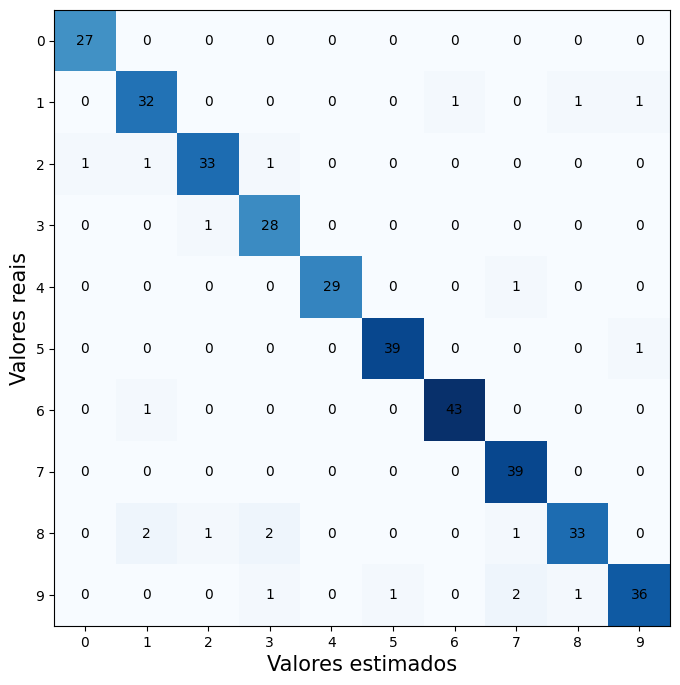

In [24]:
# plotando a matriz

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Valores estimados', fontsize=15, color='black')
ax.set_ylabel('Valores reais', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

In [25]:
# Como vimos anteriormente, podemos também gerar um relatório com os resultados:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



# Exercício:

1. Reproduzir o último exercício trocando o dataset load_digits pelo dataset MNIST. Utilize apenas as primeiras 2 mil amostras para treinamento e as próximas mil amostras para teste.

In [26]:
# Passo 1: Importando os dados
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_openml

In [27]:
# Passo 2a: importando os dados
mnist = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/home/hub/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [28]:
mnist[0].shape

(70000, 784)

Amostra: 1


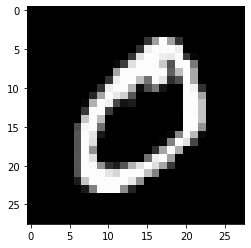

In [10]:
# Visualizando alguns digitos
sample = np.random.randint(0, len(mnist))
print("Amostra:", sample)
img = mnist[0][sample].reshape((28,28)).astype(np.uint8)

imgplot = plt.imshow(img, cmap="gray")

In [5]:
# Passo 2b: dividindo os dados em conjunto de treino e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(mnist[0], mnist[1], test_size=0.3,
                                                    random_state=0, shuffle=True)

In [6]:
# Passo 2c: Normalizando os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [7]:
# Passo 3: Criando e treinando o modelo
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [8]:
# Passo 4: Avaliando o modelo

# A avaliação do modelo é similar ao que fizemos nos exemplos anteriores. A diferença é que usaremos
#   o conjunto de teste para esse processo, em vez do conjunto de treinamento.

# primeiramente, precisamos normalizar as amostras do conjunto de testes:
x_test = scaler.transform(x_test)

# em seguida, chamamos a função predict, passando o conjunto de testes:
y_pred = model.predict(x_test)

print('Acurácia sobre conjunto de teste = ',model.score(x_test, y_test))

Acurácia sobre conjunto de teste =  0.9070952380952381


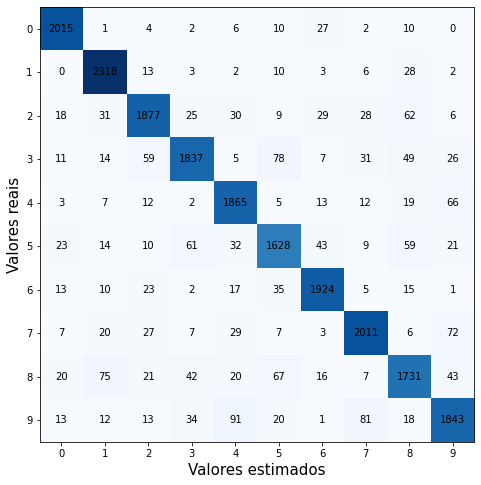

In [9]:
# plotando a matriz de confusão

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Valores estimados', fontsize=15, color='black')
ax.set_ylabel('Valores reais', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()